# `AA Workshop 10` - Introduction to Neural Networks

In this workshop we provide a very short introduction to neural networks in Python. This is very far from a comprehensive coverage of the topic but can provide a quick start for those who wish to learn more about the topic in their own time. We will cover a classification and a regression task using `keras` as our python package of choice. If you want to try and implement a NN from scratch, there are several good online tutorials that can help you do so (see [here](https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6) for example).


---

## Biological inspiration
The (for our purpose) smallest stand-alone element in the human brain is the neuron. Its understanding and computational recreation build the foundation for ANNs. A simplified image of a "real" neuron can be seen below:

![](bio_neuron.png)

Dendrites are connecting to the axons (or "outputs") of other neurons, for instance, nerves in the sensory system or other processing neurons. In the nucleus, these input signals are aggregated and forwarded through the axon. The axon terminals then connect to further neurons to build the neural network. The connection between axon terminal and dendrite is what we are calling a synapse. In the human brain, there are billions of neurons and $10^{14} - 10^{15}$ synapses in the human brain. If each synapse (or more precisely, its connection strength) would be represented by 8 bits or one byte, just storing these numbers would take 1000 TB already.

---

## Computational implementation
To recreate neural networks artificially, neurons have to be defined. The common mathematical model used for this purpose is depicted below:

![](math_neuron.jpeg)

From a certain number of input synapses $x_i$, signals come in with a weight factor of $w_i$. This represents the strength of the synapse. In the _nucleus_ these weighted inputs are aggregated and a bias is added. The bias is not explicitly shown in every model, but it does make the neural network more generalizable. After adding of the weighted inputs and the bias, everything is fed into a (non-linear) activation function. The output is then either fed forward to further neurons or is the output of your neural network. If there is only one neuron that takes direct inputs and whose output is your interest, the model is called a single-layer perceptron. Many of these neurons can create almost arbitrary logical connections and functions, making ANNs very powerful. In this case, we are talking about a multi-layer perceptron (MLP) model: 

![](mlp-network.png)

### Activation Function

The activation function is (to some degree) the heart of the neural network. Without a non-linear activation function, all hidden layers do not add any value, but are instead a complicated way to represent a liner model. Only with a non-linear activation function, ANNs can recreate non-linear hypothesis functions. In the beginning of research on the ANNs in the scope of AI, typically a unit step was used as an activation function. The unit step is $0$ for inputs smaller than $0$ and $1$ otherwise. The idea behind this is to recreate the behavior of a biological neuron that _fires_ if a certain threshold of inputs is exceeded. Today, other activation functions are more commonly used. This is linked to better mathematical qualities in terms of learning behavior and convergence. Some of the most popular activation functions are:

Sigmoid: $\sigma(z) = \frac{1}{1+exp(-z)}$

Hyperbolic tangent: $\sigma(z) = \frac{2}{1+exp(-2z)} -1 $

ReLU (Rectified Linear Unit): $\sigma(z) = z\quad  for\ z>0,\ 0\ otherwise$

### Learning

As learning of ANNs is a non-trivial mathematical task, we are only aiming for an intuitive understanding here. Let's have a look at our complete MLP first.

The general learning task consists of two steps, which are repeated until the algorithm converges:
1. __Feedforward: Calculating the predicted output ŷ and the associated loss__. At first, we randomly assign values for the weights (and the biases). Based on the input features, the output value is calculated.
2. __Backpropagation: Updating the weights W and biases b__. If the output value and the target value differ, the weights and biases are updated. To do this, it is calculated how much each weight and bias contributes to the error. Proportionally to this, they are then corrected (scaled with a small learning factor). In this sense, the updating rule has some similarity to gradient descent, only that is is propagated through the entire network, which is why this algorithm is called backpropagation.

The training routine for a simple 2-layered MLP is shown in the below figure:

![](training.png)

### Hyperparameters

The main hyperparameters of an MLP are: 

1. Number of hidden layers
1. Number of nodes
4. Activation function

The more layers and nodes there are (and the denser the network is, i.e. the more edges have a non-zero weight) the harder it gets to learn the model. That's the reason why bigger ANNs are normally not trained on a local computer anymore, but on specialized computers. Furthermore, there are additional libraries for python to improve the efficiency of ANNs, e.g. TensorFlow or Keras, which we take a first look at in today's tutorial.

---

## `Keras`

`Keras` is one of the most popular Deep Learning libraries. `PyTorch` and `Jax` are the most used numerical platforms in Python to build Deep Learning algorithms but they can be quite complex and difficult to use.

Keras, by contrast, is easy to use and is capable of running on top of multiple low-level tensor operation frameworks. The full documentation of the keras API can be found [here](https://keras.io).

Note that `scikit learn` also features an MLP implementation (see [here](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)). Yet, `keras` has advanced to be one of the most popular frameworks used in practice, which is why we focus on it in this short tutorial.

We use `Keras` to command `PyTorch`, therefore we need to install both.

PyTorch's installation method varies by platform and environment manager, all of the options are listed [here](https://pytorch.org/get-started/locally/).

If you use the provided `environment.yml` specification, you should be set.

### Neural networks for classification in `keras`

To stay with our example, we will build a NN that predicts the class of a breast cancer cell by categorizing it as either malignant or benign. 

In [1]:
# import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# supress versioning warnings of keras
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


Because keras can work with multiple different backends, it is important to specify that we want to use PyTorch before importing keras for the first time:

In [2]:
import os
os.environ["KERAS_BACKEND"] = "torch"

In [3]:
import keras
from keras import Sequential # sequential model: https://keras.io/guides/sequential_model/
from keras.layers import Dense, Dropout

#### Data Preparation

In [4]:
# load data
cancer_df = pd.read_csv("../data/breast_cancer.csv", index_col = "id")
cancer_df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [5]:
# define x and Y
X = cancer_df.iloc[:,1:31] # include full feature vector
y = cancer_df["diagnosis"]


# encode categorical target vector
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [6]:
# conduct train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Initializing and Training the ANN

We start by defining the type of model we want to build. There are two types of models available in Keras: the [Sequential model](https://keras.io/models/sequential/) and the model class used with [functional API](https://keras.io/models/model/). Then, we simply add the input-, hidden- and output-layers.

Between them, we are using [dropout](http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf?utm_content=buffer79b43&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer) to prevent overfitting (dropout rate should be between 20% and 50%).

![](dropout.png)

At every layer, we use “Dense” which means that the nodes are fully connected.

In our example, the input-layer takes 30 inputs (because our feature vector includes 30 features) and outputs it with a shape of 15, which is the number of nodes in the first hidden layer that we define. Then, we define a second hidden layer with 15 nodes, before adding the output layer with a single node (since we are solving a binary classification problem).

In [8]:
# initialize the ANN
classifier = Sequential()

We need to pass the following parameters:

- input_shape - number of columns of the dataset (only for input layer)

- units - number of neurons and dimensionality of outputs to be fed to the next layer, if any

- activation - activation function (we use ReLU in this case)


In [9]:
# adding the input layer and the first hidden layer (with 15 nodes)
classifier.add(Dense(input_shape = (30,), 
                     units=15,          # dimensionality of the output space (# of nodes in the first hidden layer)
                     activation='relu'))

# adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.2))

We add an additional second layer, also with 15 nodes.

In [10]:
# adding the second hidden layer
classifier.add(Dense(units= 15,
                     activation='relu'))

# adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.2))

Finally we add the output layer. Since we perform a binary classification, a single output node suffices. We use a sigmoidal activation function for this last node which is often used when dealing with binary classfication problems.

In [11]:
# adding the output layer
classifier.add(Dense(units= 1, activation='sigmoid'))

First we compile the model to configure it for training. We add the following parameters:
- `optimizer`: Here we use the adam optimizer, an optimizer with higher performance in many cases than stochastic gradient descent (SGD). See [here](https://keras.io/optimizers/) for a list of all optimizers implemented in `keras`.
- `loss`: specifies the loss to be minimized. In this example we use binary cross-entropy, a common loss for binary classification tasks. See [here](https://keras.io/losses/) for an overview of available losses in `keras`.
- `metrics`: the metric function is similar to a loss function, except that the results from evaluating a metric are not used when training the model and merely function as an indicator of model performance to the data scientist. In this example we report the accuracy. An overview ov available metrics can be found [here](https://keras.io/metrics/).

In [12]:
# compiling the ANN
classifier.compile(optimizer="adam",    # Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments
              loss="binary_crossentropy",  # this is a good loss for binary classification
              metrics=["accuracy"]) # standard classification evaluation emtric

In [13]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 721 (2.82 KB)

 Trainable params: 721 (2.82 KB)

 Non-trainable params: 0 (0.00 B)

We are now able to train our model. We do this with a batch_size of 50 and for 100 epochs.

- `batch_size` defines the number of samples that will be propagated through the network 
- `epoch` defines the number of iterations over the entire training data

In general a larger batch-size results in faster training, but does not always converge fast. A smaller batch-size is slower in training but it can converge faster. This is definitely problem-dependent and you need to try out a few different values (the standard batch-size is 32). The same goes for the number of epochs.

In [14]:
# fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size=50, epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7312 - loss: 0.5890
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7965 - loss: 0.5513
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8216 - loss: 0.5113
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8543 - loss: 0.4627
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8945 - loss: 0.4137
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9221 - loss: 0.3679
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9070 - loss: 0.3599
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9070 - loss: 0.3239
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9322 - loss: 0.2896
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9296 - loss: 0.2620
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9347 - loss: 0.2389
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9623 - lo

In [15]:
# report classification performance on test set
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

confusion_matrix = confusion_matrix(y_test, classifier.predict(X_test).round(decimals=0).astype(int))
accuracy_score = accuracy_score(y_test, classifier.predict(X_test).round(decimals=0).astype(int))
precision_score = precision_score(y_test, classifier.predict(X_test).round(decimals=0).astype(int))

print("Confusion Matrix")
print(confusion_matrix)
print()
print("Accuracy")
print(round(accuracy_score, ndigits=4))
print()
print("Precision")
print(round(precision_score, ndigits=4))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Confusion Matrix
[[107   1]
 [  1  62]]

Accuracy
0.9883

Precision
0.9841


### Neural networks for regression in `keras`

Neural networks can also be trained for regression tasks. The logic is exactly the same, yet some of the parameters, such as loss, metrics, input and ouput as well as typical activation functions might have to be adapted to the specific case. There are a range of very good tutorials online, which we encourage you to take a look at (for example [here](https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/)). 

We will cover a simple implimentation on the `Diamonds` dataset. The objective in this task is to predict the price of a particular diamond based on different features.

In [16]:
# load data
diamonds = sns.load_dataset('diamonds')
diamonds.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
25412,2.14,Ideal,I,SI2,60.7,57.0,14138,8.34,8.40,5.08
31267,0.32,Ideal,I,VS2,62.5,55.0,449,4.37,4.40,2.74
19481,1.67,Premium,H,SI2,62.6,60.0,8118,7.57,7.52,4.72
35203,0.44,Very Good,J,VS1,63.1,57.0,891,4.87,4.83,3.06
39720,0.54,Premium,G,SI2,61.4,59.0,1090,5.21,5.24,3.21


In [17]:
# inspect the data
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


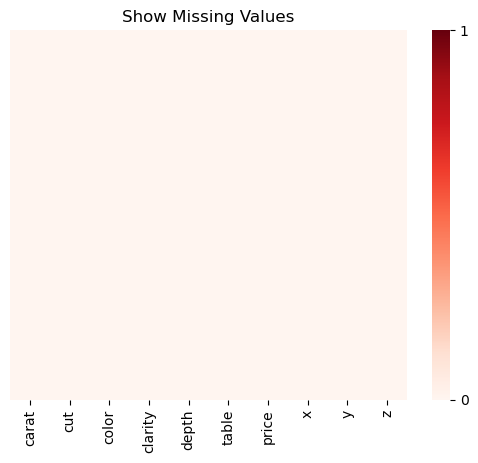

In [18]:
# no missing values
fig, ax = plt.subplots(1,1)
sns.heatmap(diamonds.isna(), ax=ax,
           vmin=0, vmax=1, cmap="Reds",
           cbar_kws={"ticks":[0,1]})
ax.set_yticks([])
ax.set_title("Show Missing Values")
plt.show()

#### Creating Dummy variables

Since in the diamond dataset we have three categorical input features, we need to convert them into dummy variables.

In [19]:
# generate dummies for categorical features
diamonds = pd.get_dummies(diamonds)
diamonds.sample(5)

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
36798,0.34,62.8,58.0,956,4.45,4.43,2.79,False,True,False,...,False,False,False,False,False,False,True,False,False,False
21810,1.04,62.8,58.0,9882,6.45,6.42,4.04,False,True,False,...,False,False,False,False,True,False,False,False,False,False
23454,1.91,60.7,56.0,11447,8.01,8.09,4.89,True,False,False,...,False,True,False,False,False,False,False,True,False,False
39231,0.38,61.6,57.0,1067,4.65,4.73,2.89,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2219,0.84,63.6,57.0,3145,5.95,6.00,3.80,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [20]:
# defining inputs and output
X = diamonds.drop("price", axis=1)
y = diamonds["price"]

In [21]:
# splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# normalizing training data
st_scaler = StandardScaler()
st_scaler.fit(X_train)
X_train_scaled = st_scaler.transform(X_train)

#### Initializing the ANN

In [23]:
# initialize the ANN
model = Sequential(
    [Dense(36, activation="relu", input_shape=[X_train.shape[1]]),
    Dense(36, activation="relu"),
     Dense(1)])

In [24]:
# compile the ANN
model.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 36)                  │             972 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 36)                  │           1,332 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              37 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,341 (9.14 KB)

 Trainable params: 2,341 (9.14 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# train the ANN
epochs = 20
history = model.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

Epoch 1/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - loss: 17152134.0000 - mae: 2662.4119 - mse: 17152134.0000 - val_loss: 2678416.7500 - val_mae: 1107.3782 - val_mse: 2678416.7500
Epoch 2/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 1746839.7500 - mae: 774.2750 - mse: 1746839.7500 - val_loss: 940222.0625 - val_mae: 611.7204 - val_mse: 940222.0625
Epoch 3/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - loss: 1148429.8750 - mae: 604.5130 - mse: 1148429.8750 - val_loss: 761777.5000 - val_mae: 576.1616 - val_mse: 761777.5000
Epoch 4/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 1056158.6250 - mae: 581.9449 - mse: 1056158.6250 - val_loss: 717065.8125 - val_mae: 557.5765 - val_mse: 717065.8125
Epoch 5/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 1001511.6875 - mae: 560.0383 - mse: 1001511.6875 - val_loss: 688537.8750 - val_mae: 531.5144 - val_mse: 688537.8750
Epoch 6/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 953080.5625 - mae: 535.6542 - mse: 953080.

In [27]:
# generate predictions
model.predict(X_train_scaled[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[ 9296.257  ],
       [  750.63385],
       [10391.029  ],
       [ 2784.4197 ],
       [ 3318.8655 ],
       [  832.1019 ],
       [ 6911.986  ],
       [ 4232.4907 ],
       [ 7667.2285 ],
       [ 2586.6917 ]], dtype=float32)

In [28]:
# inspect metrics by epoch
history_df = pd.DataFrame(history.history)
history_df

,loss,mae,mse,val_loss,val_mae,val_mse
0,1.715213e+07,2662.411865,1.715213e+07,2.678417e+06,1107.378174,2.678417e+06
1,1.746840e+06,774.275024,1.746840e+06,9.402221e+05,611.720398,9.402221e+05
2,1.148430e+06,604.513000,1.148430e+06,7.617775e+05,576.161621,7.617775e+05
3,1.056159e+06,581.944885,1.056159e+06,7.170658e+05,557.576538,7.170658e+05
4,1.001512e+06,560.038330,1.001512e+06,6.885379e+05,531.514404,6.885379e+05
5,9.530806e+05,535.654236,9.530806e+05,6.534713e+05,513.104980,6.534713e+05
6,9.089224e+05,516.906372,9.089224e+05,6.269330e+05,497.702972,6.269330e+05
7,8.723025e+05,499.204376,8.723025e+05,6.020323e+05,478.368225,6.020323e+05
8,8.382988e+05,481.098724,8.382988e+05,5.825689e+05,456.555298,5.825689e+05
9,7.985178e+05,462.757965,7.985178e+05,5.702426e+05,440.947388,5.702426e+05


In [29]:
# generate RMSE for better interpretability
root_metrics_df = history_df[["mse", "val_mse"]].apply(np.sqrt)
root_metrics_df.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
root_metrics_df

,rmse,val_rmse
0,4141.513491,1636.586921
1,1321.680654,969.650485
2,1071.648205,872.798659
3,1027.695784,846.797386
4,1000.755558,829.781824
5,976.258451,808.375725
6,953.374205,791.791008
7,933.971359,775.907412
8,915.586595,763.261996
9,893.598239,755.144067


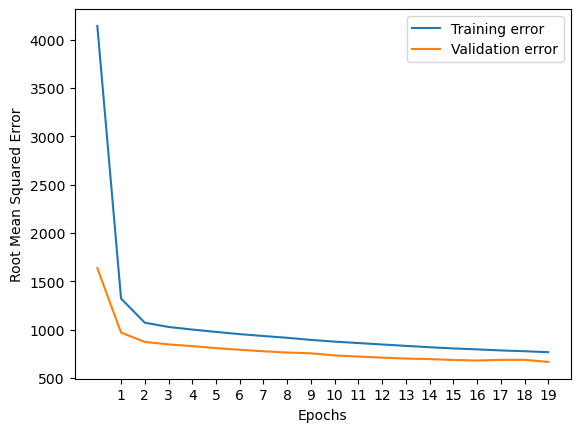

In [30]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(root_metrics_df["rmse"], label = 'Training error')
plt.plot(root_metrics_df["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

# plt.xlim([0, epochs])
plt.xticks(range(1,20))
plt.legend()

plt.show()

In [31]:
# generate predictions on test set
X_test_scaled = st_scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

506/506 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [32]:
# report performance on test set
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: ", mean_absolute_error(y_test, y_pred))

RMSE:  682.7322407064134
MAE:  370.5621032714844


---